## Replication for "Asymmetry by Design", August 4, 2020
### By Adam Goldstein and Charlie Eaton

### Figure 3: Regression adjusted means by multibrand status and investor ownership

In [1]:
%set graph_format svg

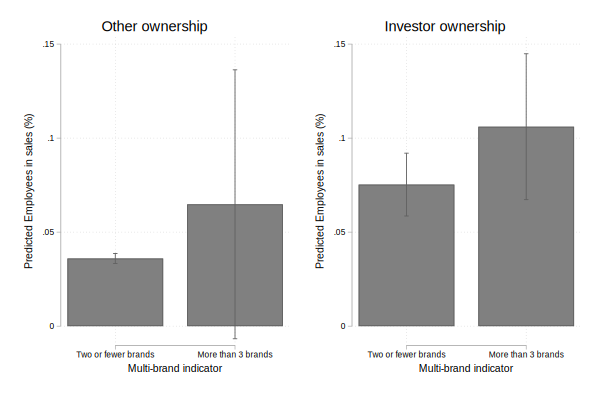
















. foreach var in law_enf_frst_this_yr {


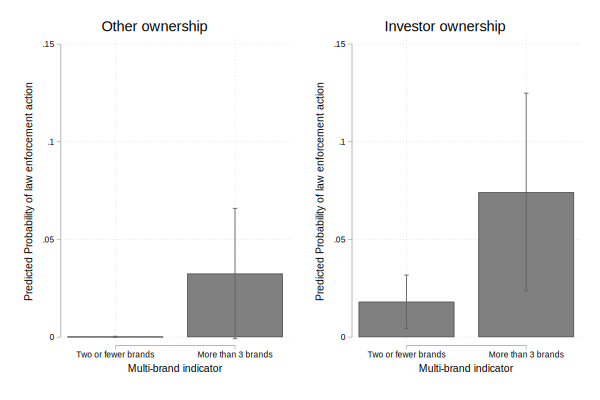

In [6]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/asymmetry_20191229.dta", clear
quietly set scheme plotplain
quietly sort unitid year
quietly by unitid: replace alt2multi_brands_all=0 if alt2multi_brands_all==1 & alt2multi_brands_all[_n+1]==0
quietly by unitid: replace alt2multi_brands_all=0 if alt2multi_brands_all==1 & alt2multi_brands_all[_n+1]==0 & alt2multi_brands_all[_n-1]==0

quietly collapse (rawsum) sftesale sftetotl (mean) system_under grad_rate_150_p_w ///
pctchrtgrbkaat_w pctchrtgrwhitt_w pctchrtgrhispt_w loan_amount_borrower_c_w tuitionall_c_w selective ///
white_share_w black_share_w hisp_share_w pell_grants_per_fte_c_w dist_pell_s ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz online ///
(first) state_n   (min) iclevel (max) law_enf_frst_this_yr alt2multi_brands_all pe_po [aweight=all_under], by(systemid year)

quietly label define alt2multi_brands_all 0 "Two or fewer brands" 1 "More than 3 brands"
quietly label values alt2multi_brands_all alt2multi_brands_all

quietly gen fracsales2= sftesale /sftetotl

quietly xtset systemid year

quietly label var alt2multi_brands_all "Multi-brand indicator"
quietly label var fracsales2 "Employees in sales (%)"

quietly label var law_enf_frst_this_yr "Probability of law enforcement action"

**Adjusted Sales
foreach var in fracsales2 {
    
quietly reg `var' i.pe_po##i.alt2multi_brands_all system_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* i.year ,    cluster(systemid)

quietly margins  i.alt2multi_brands_all if pe_po==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.alt2multi_brands_all if pe_po==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}

foreach var in law_enf_frst_this_yr {
    
quietly probit `var' i.pe_po##i.alt2multi_brands_all system_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* i.year ,    cluster(systemid)

quietly margins  i.alt2multi_brands_all if pe_po==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.alt2multi_brands_all if pe_po==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}   









(1508 real changes made)

(170 real changes made)


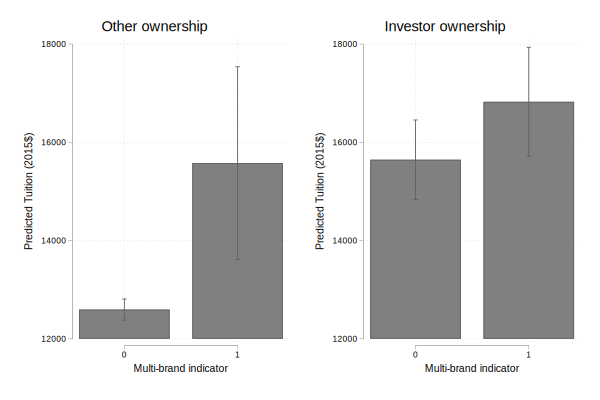

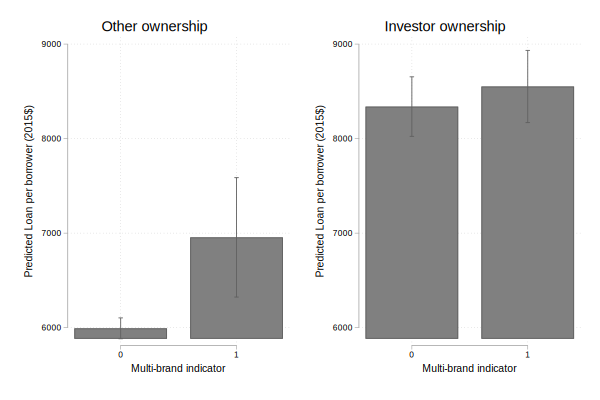

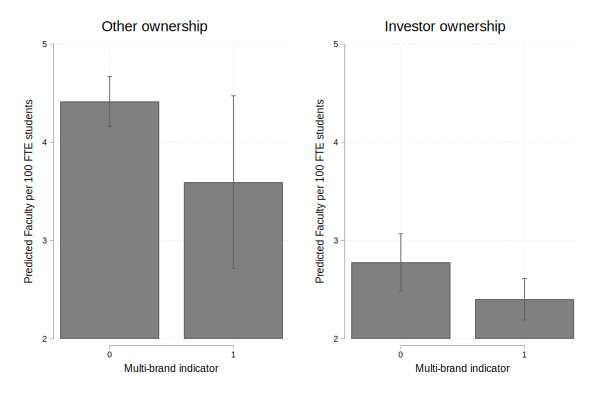

In [3]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/asymmetry_20191229.dta", clear
quietly set scheme plotplain
quietly set more off
quietly est clear
quietly xtset unitid year
gsort unitid -year
quietly replace grad_rate_150_p_w=grad_rate_150_p_w*100 if grad_rate_150_p_w!=0
by unitid: replace alt2multi_brands_all=0 if alt2multi_brands_all==1 & alt2multi_brands_all[_n+1]==0
by unitid: replace alt2multi_brands_all=0 if alt2multi_brands_all==1 & alt2multi_brands_all[_n+1]==0 & alt2multi_brands_all[_n-1]==0
label var tuitionall_c_w "Tuition (2015$)"
label var alt2multi_brands_all "Multi-brand indicator"

foreach var in tuitionall_c_w loan_amount_borrower_c_w ft_faculty_per_100fte_w {
    
quietly reg `var' i.pe_po##i.alt2multi_brands_all system_under all_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* i.year ,    cluster(systemid)

quietly margins  i.alt2multi_brands_all if pe_po==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.alt2multi_brands_all if pe_po==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}   

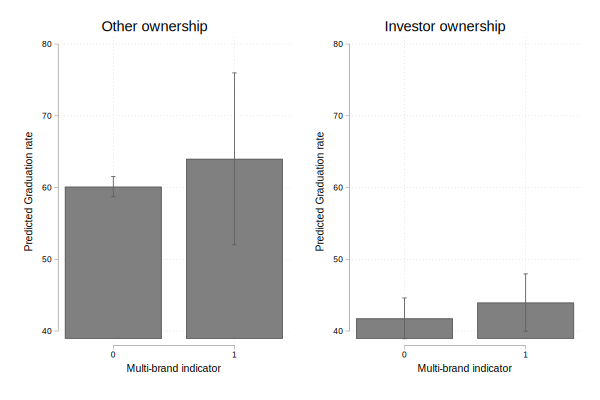

In [4]:
foreach var in grad_rate_150_p_w {

quietly reg `var' i.pe_po##alt2multi_brands_all system_under online all_under i.iclevel dpcttype* i.year ///
pell_grants_per_fte_c_w pctchrtgrbkaat pctchrtgrhispt pctchrtgrwhitt selective ,    cluster(systemid)

quietly margins  i.alt2multi_brands_all#i.pe_po, atmeans

quietly margins  i.alt2multi_brands_all if pe_po==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.alt2multi_brands_all if pe_po==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

graph combine `var'other `var'invest, row(1) ycommon name(`var', replace)
    
}

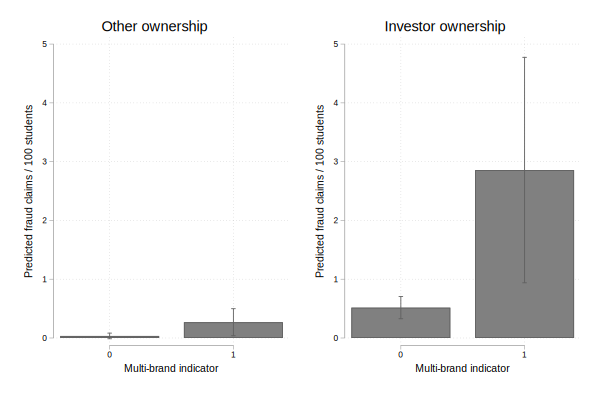

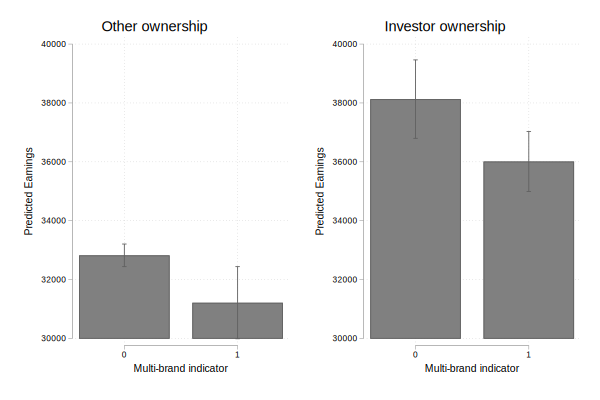

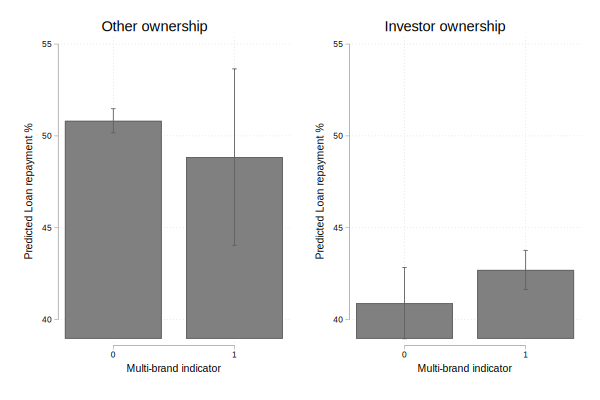

In [5]:
quietly use "/Users/Charlie/Dropbox/asymmetry by Design/Data/d_OPEID_asymmetry.dta", clear
quietly gen pe_po=0
quietly replace pe_po=1 if pe_ind==1 | public==1
label var alt2multi_brands_all "Multi-brand indicator"  

quietly gen borrower_defense_100student = claimcount / fte_count * 100
winsor borrower_defense_100student, p(.01) gen(borrower_defense_100student_w)

quietly poisson borrower_defense_100student_w i.alt2multi_brands_all##i.pe_po selective ///
white_share_w black_share_w hisp_share_w  ///
dpcttype_health dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz ///
i.iclevel i.state_n pell_grants_per_fte_c_w  , cluster(systemid) rob noomitted

quietly margins  i.alt2multi_brands_all if pe_po==1, atmeans 
quietly marginsplot, name(defenseinvest, replace) recast(bar) ///
ytitle (Predicted fraud claims / 100 students) title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.alt2multi_brands_all if pe_po==0, atmeans 
quietly marginsplot, name(defenseother, replace) recast(bar) ///
ytitle (Predicted fraud claims / 100 students) title(Other ownership, size(large))  plotopts(barw(.8))

graph combine defenseother defenseinvest, row(1) ycommon name(defense, replace)

quietly keep if rankopeid==1
quietly sort opeid year

quietly by opeid: gen l2pe_po=pe_po[_n-2]
quietly by opeid: gen l2alt2multi_brands_all=alt2multi_brands_all[_n-2]

label var l2alt2multi_brands_all "Multi-brand indicator"  

quietly label var mn_earn_wne_p6_c_w "Earnings"
quietly label var rpy_3yr_rt_supp_w "Loan repayment %"
foreach var in mn_earn_wne_p6_c_w rpy_3yr_rt_supp_w  {

quietly reg `var' i.l2alt2multi_brands_all##i.l2pe_po ///
all_under system_under online selective iclevel ///
white_share_w black_share_w hisp_share_w dpcttype* i.year earn_pct_lo , cluster(systemid)

quietly margins  i.l2alt2multi_brands_all if l2pe_po==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.l2alt2multi_brands_all if l2pe_po==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(Predicted `: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}